In [1]:
import sys
from glob import glob
from datetime import datetime, timedelta

import h5py
import numpy as np
import pandas as pd

sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')

import data_utils as du

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
with h5py.File(save_dir+'BCH_ERA5_3H_verif.hdf', 'r') as h5io:
    stn_flag = h5io['stn_flag'][...] # <--- stations within watersheds
    BCH_obs = h5io['BCH_obs'][...]
    ERA5_obs = h5io['ERA5_obs'][...]

In [5]:
with pd.HDFStore(BACKUP_dir+'BCH_85_metadata.hdf', 'r') as hdf_temp:
    metadata = hdf_temp['metadata']

stn_code = metadata['code'].values[stn_flag]
stn_lat = metadata['lat'].values[stn_flag]
stn_lon = metadata['lon'].values[stn_flag]

In [6]:
stn_code

array(['HFG', 'MSK', 'PKA', 'PMD', 'SKI', 'TNS', 'WCC', 'WRU', 'AKI',
       'AKN', 'ALU', 'ASH', 'BAR', 'BIR', 'BLN', 'BMN', 'BRI', 'BUL',
       'BVR', 'CHK', 'CHW', 'CLO', 'CLW', 'CMX', 'COQ', 'COX', 'CQM',
       'DAI', 'DBC', 'DCN', 'DLU', 'DON', 'DOW', 'EAC', 'ECL', 'ERF',
       'ERC', 'FDL', 'FER', 'FIN', 'FLK', 'FST', 'GLD', 'GOC', 'GOL',
       'GRN', 'GRP', 'GRT', 'HEB', 'HFF', 'HRN', 'HUR', 'ILL', 'JHT',
       'KEY', 'MCQ', 'MIS', 'MOB', 'MOL', 'MOR', 'MTR', 'NTY', 'PAK',
       'PNK', 'PRS', 'PUL', 'PYN', 'QBY', 'SGL', 'SHH', 'SLK', 'STA',
       'STV', 'UCE', 'WAH', 'WOL', 'WON', 'YGS', 'KWA', 'ELA', 'SAM',
       'QIN', 'QSM', 'CRU'], dtype=object)

In [7]:
N_days = 366 + 365*3
date_base = datetime(2016, 1, 1)
date_list = [date_base + timedelta(days=x) for x in np.arange(N_days, dtype=np.float)]

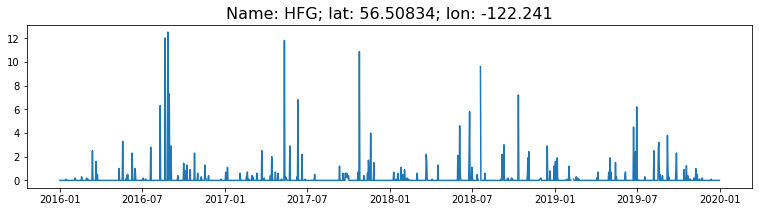

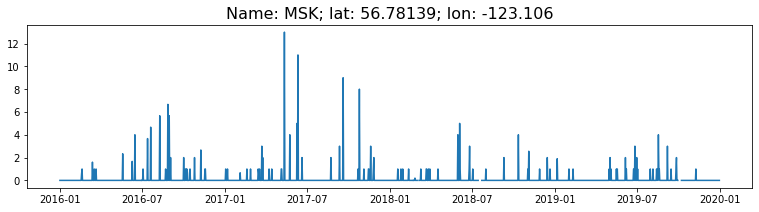

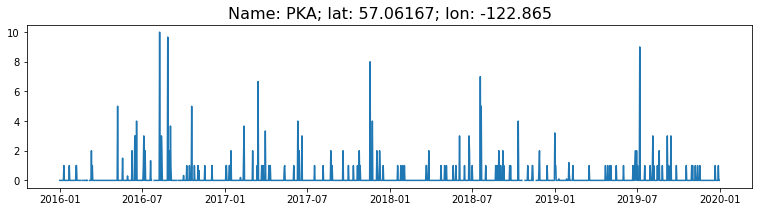

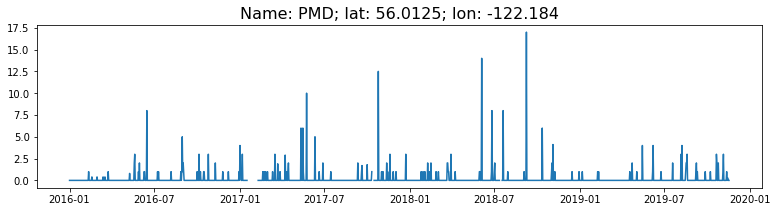

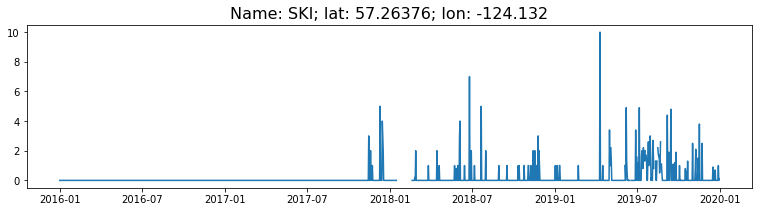

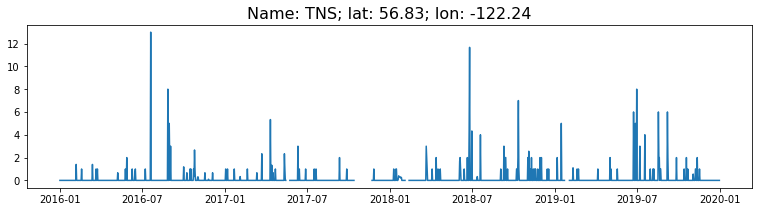

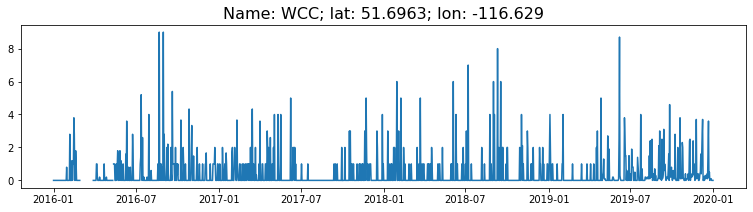

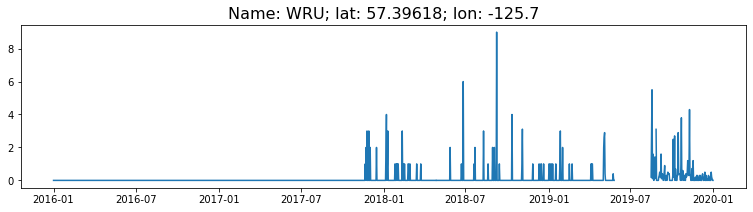

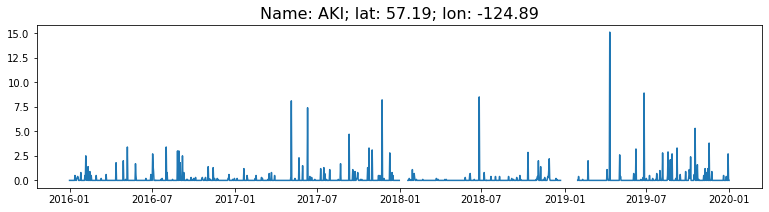

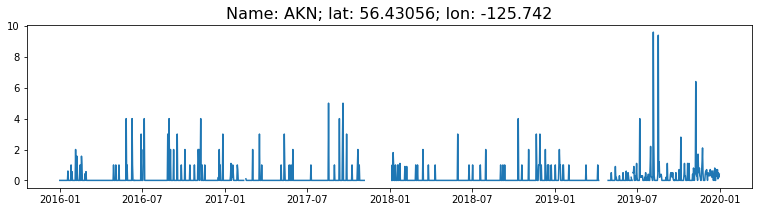

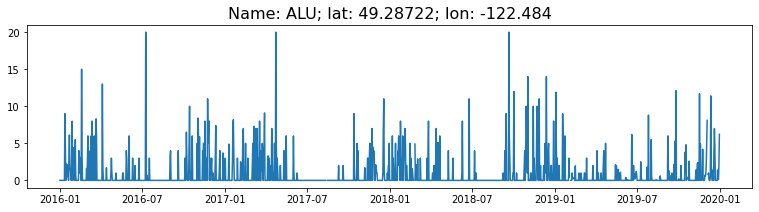

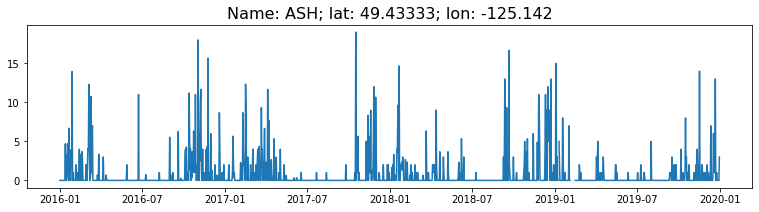

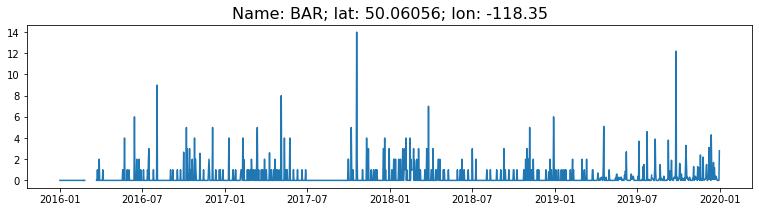

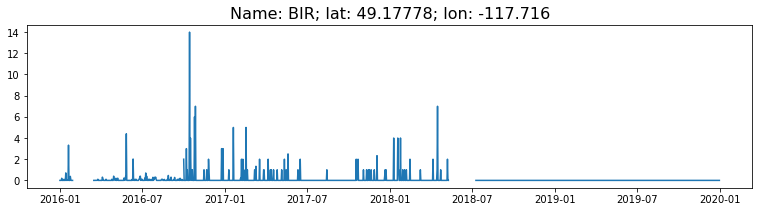

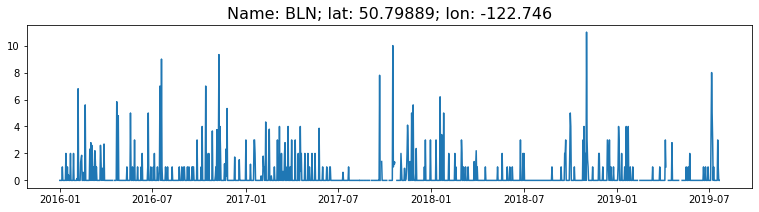

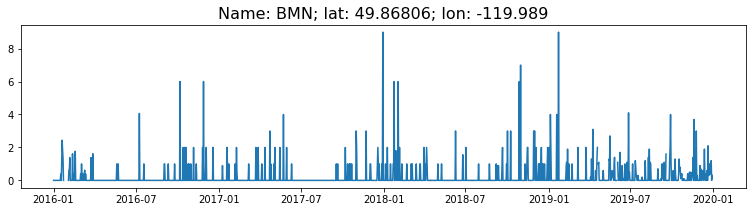

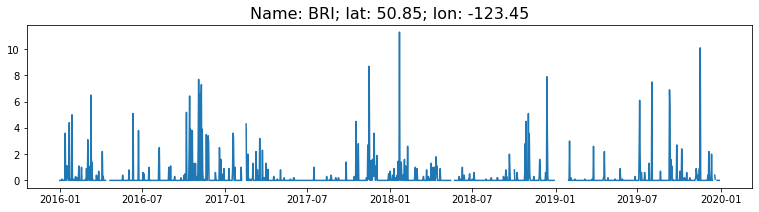

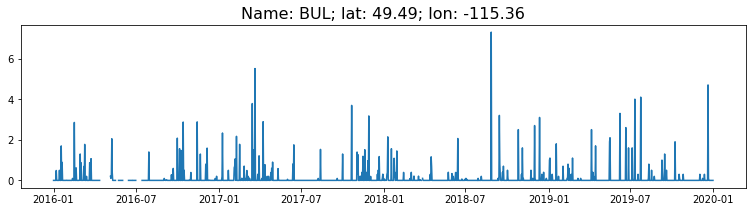

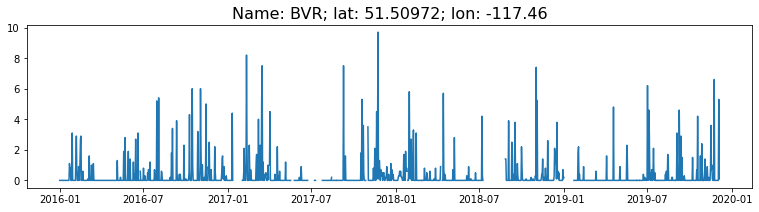

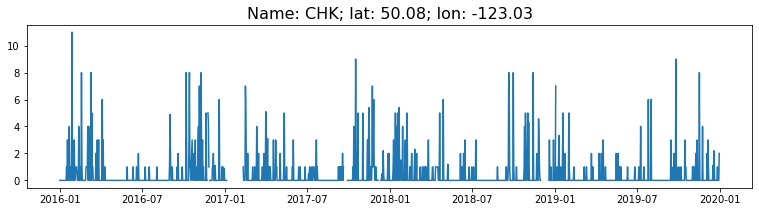

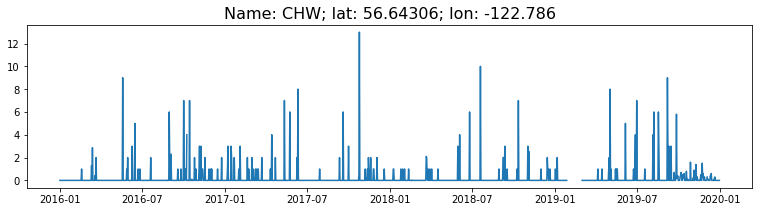

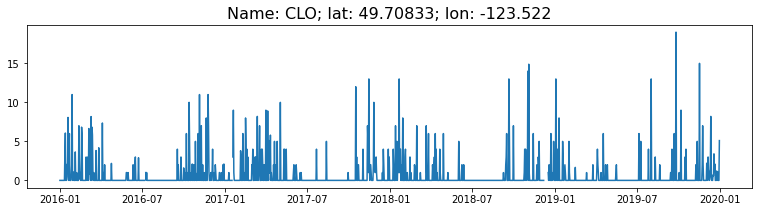

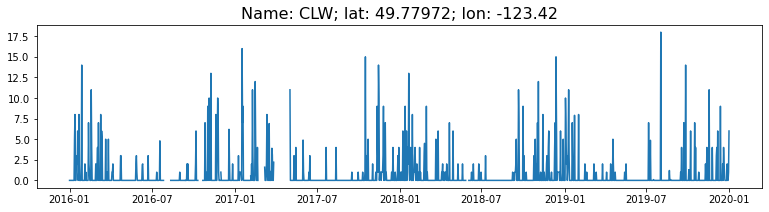

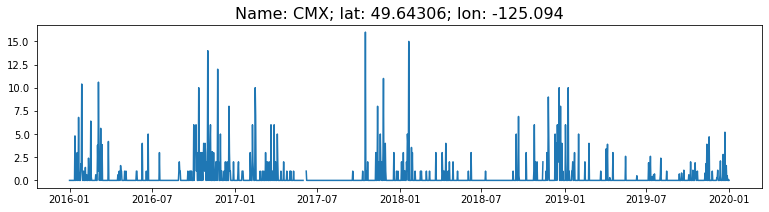

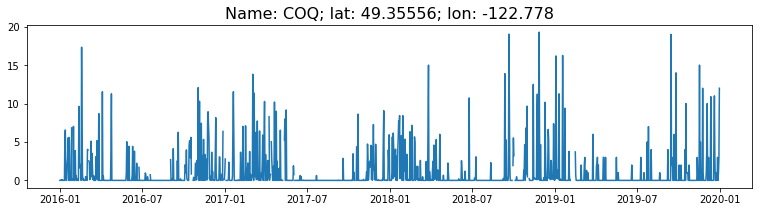

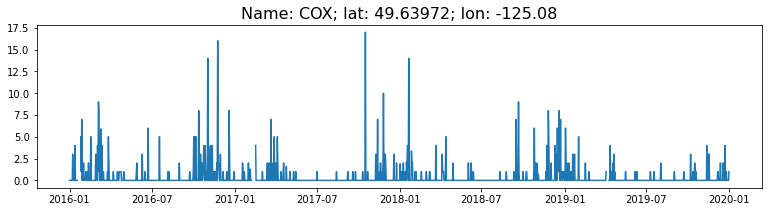

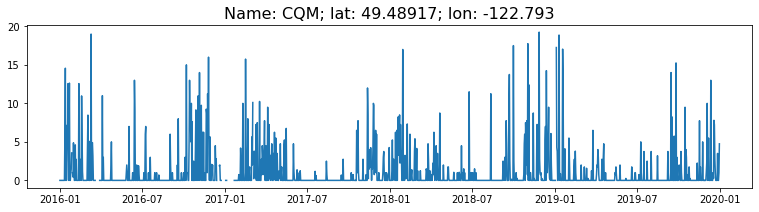

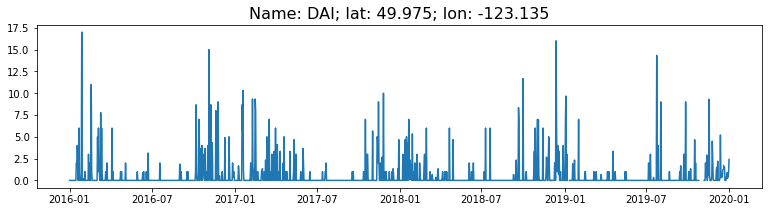

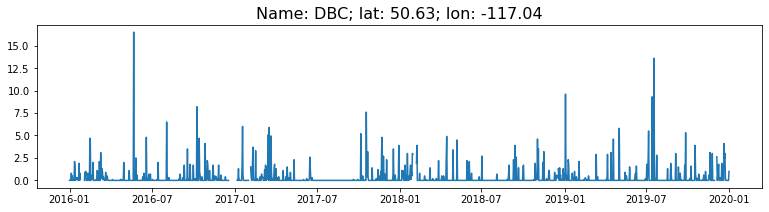

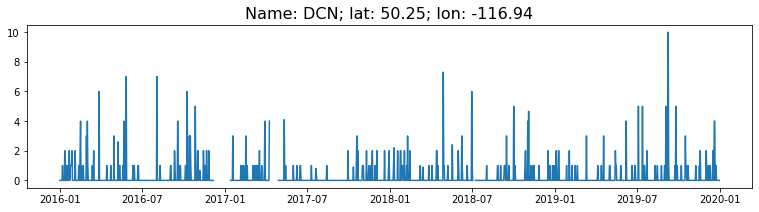

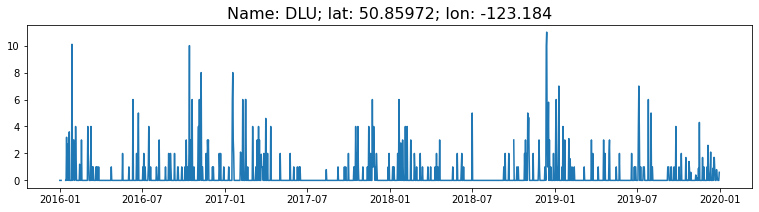

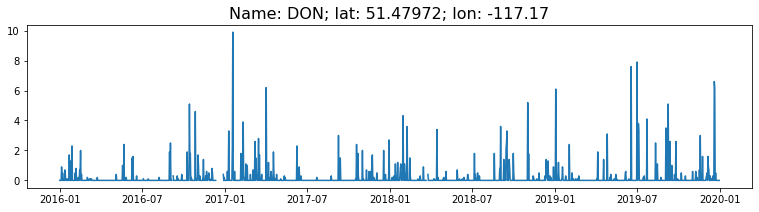

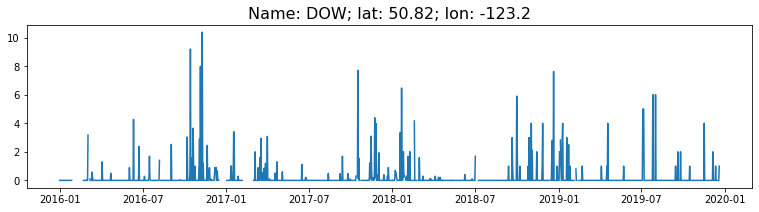

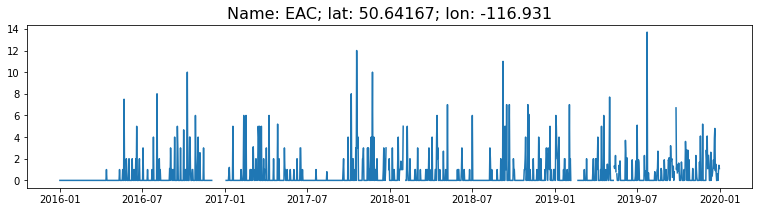

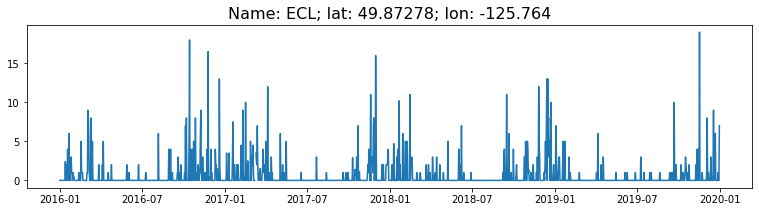

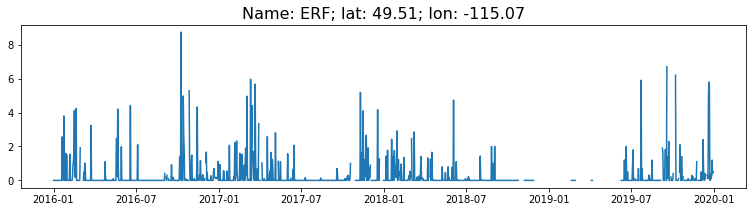

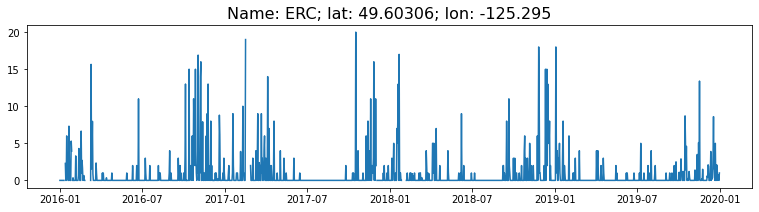

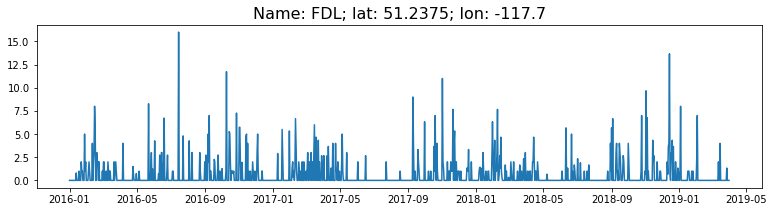

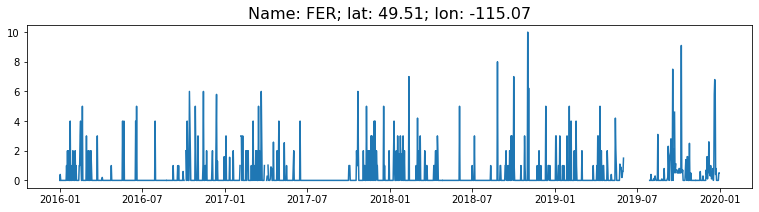

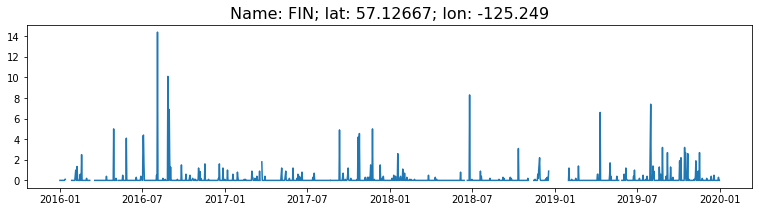

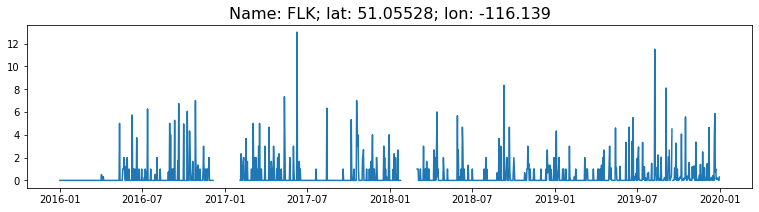

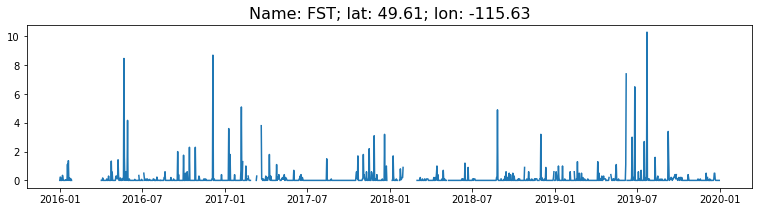

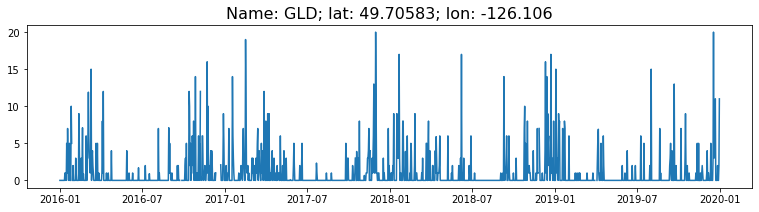

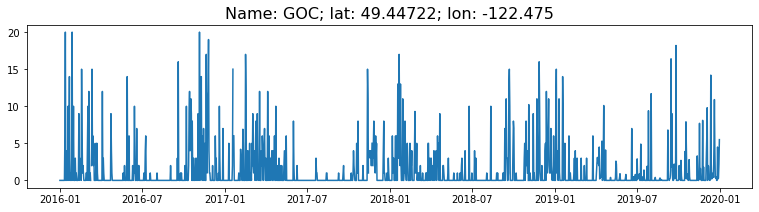

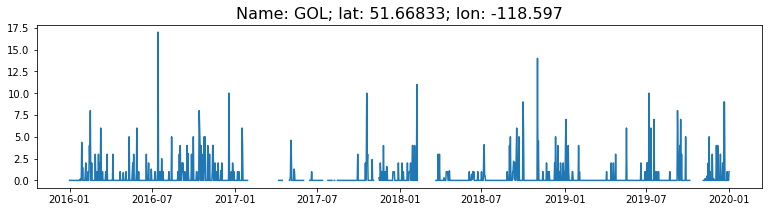

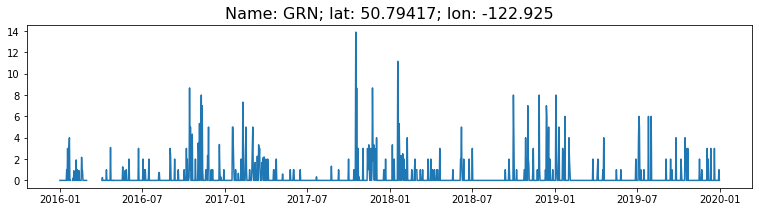

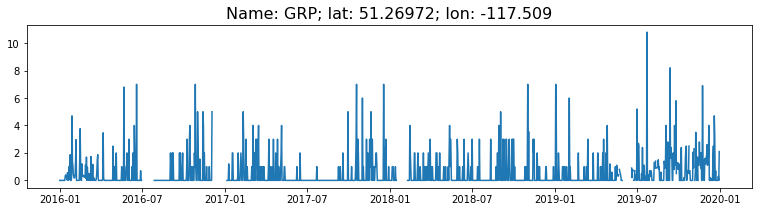

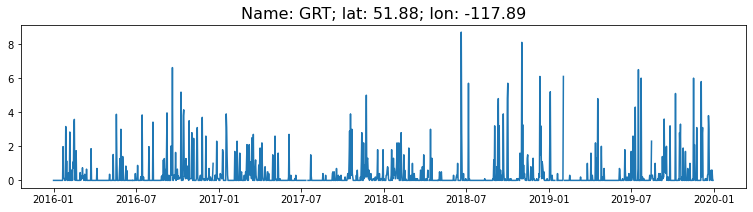

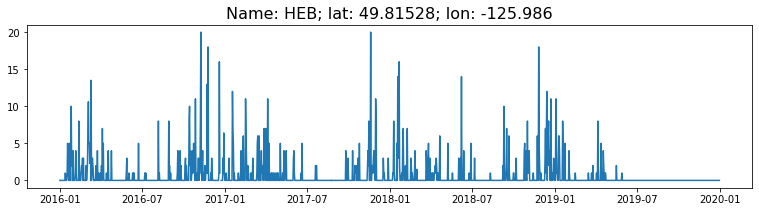

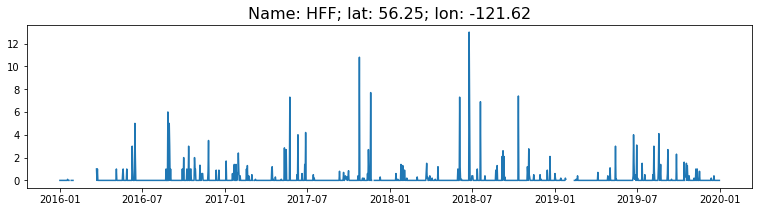

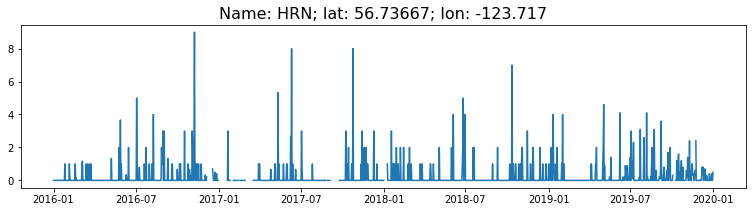

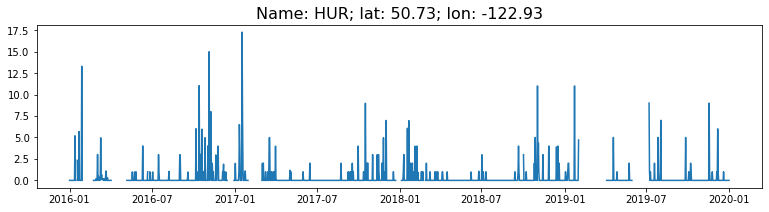

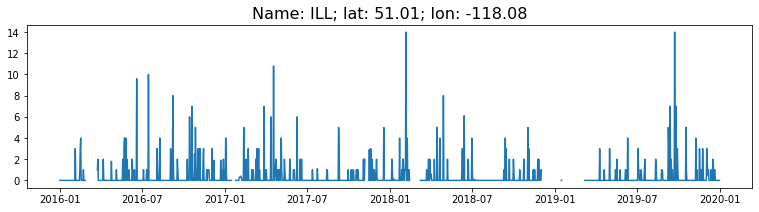

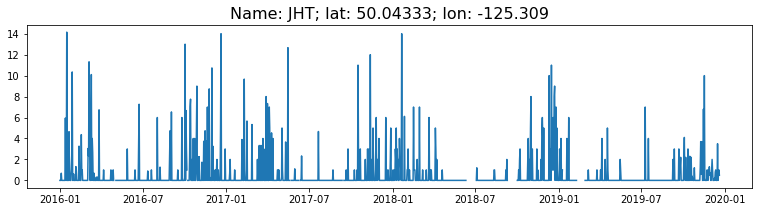

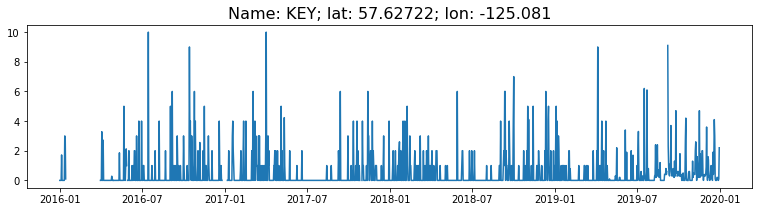

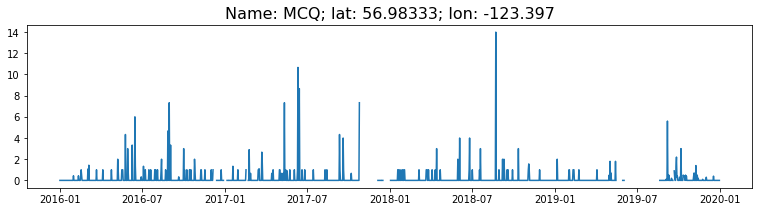

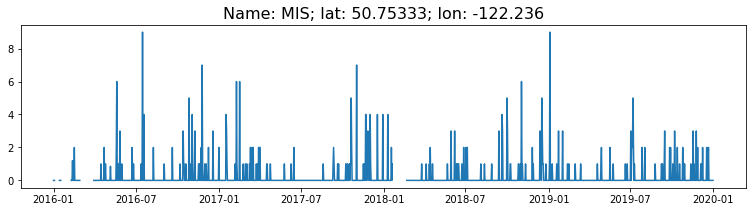

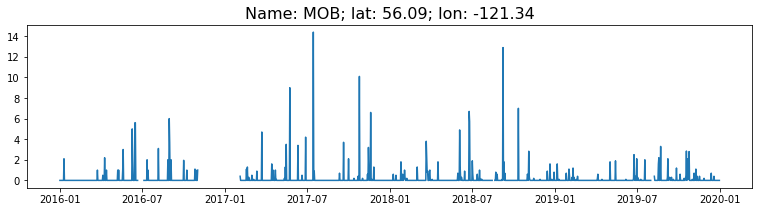

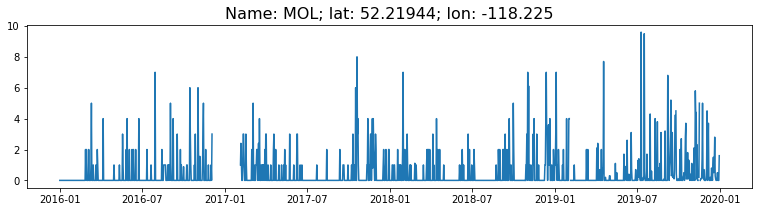

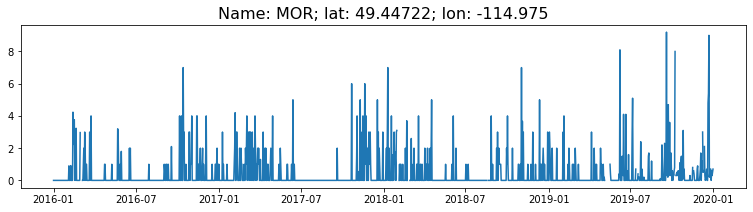

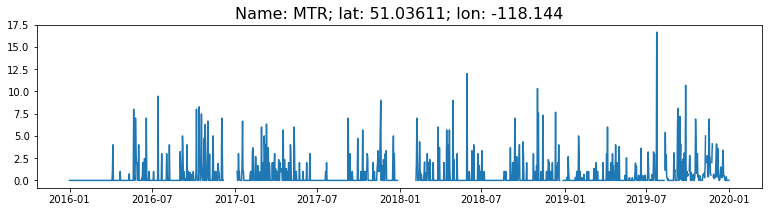

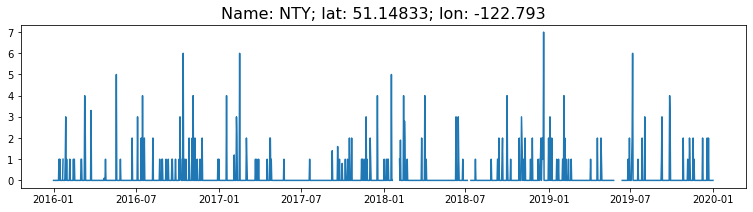

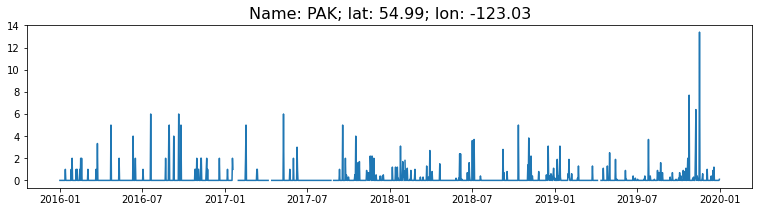

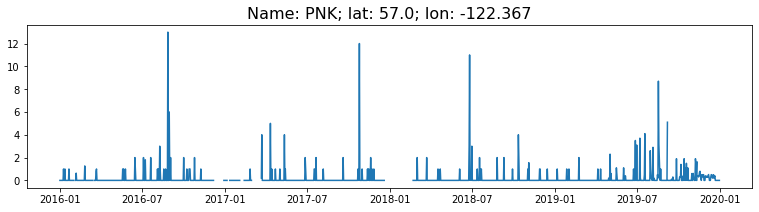

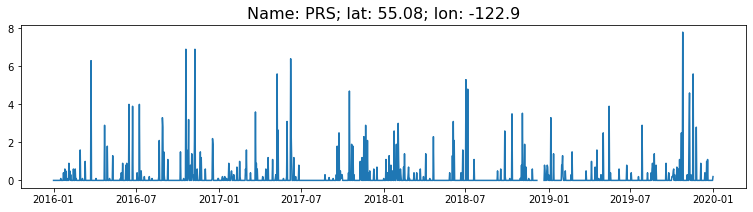

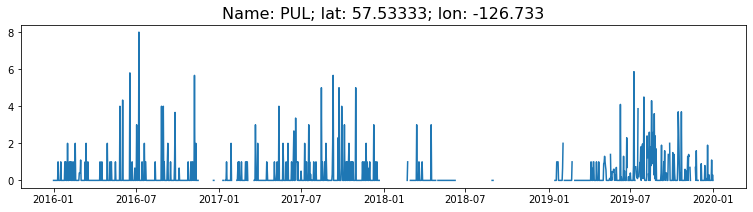

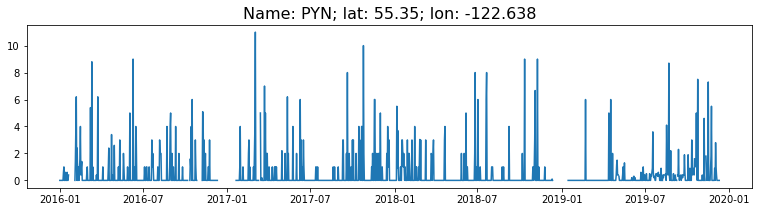

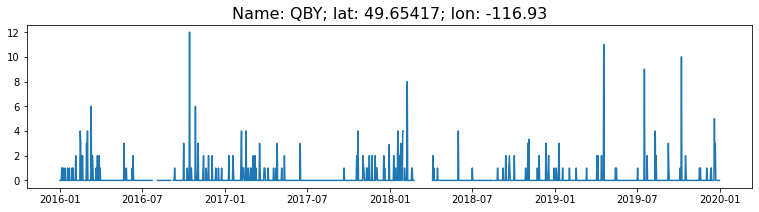

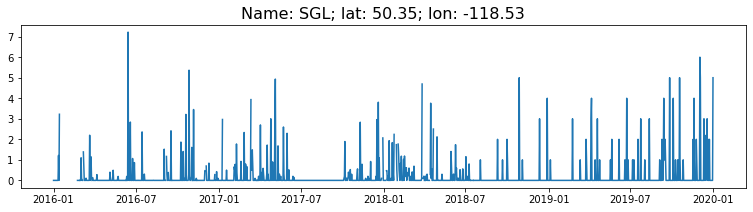

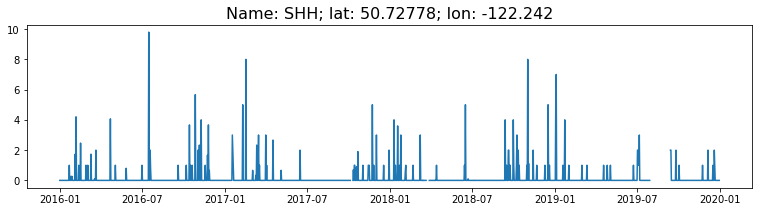

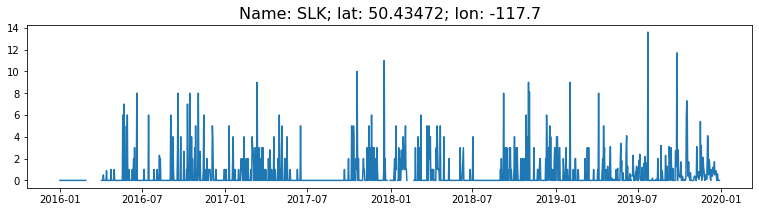

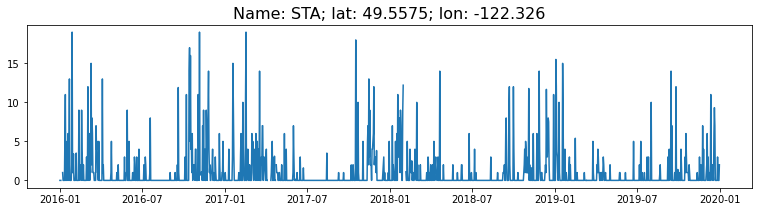

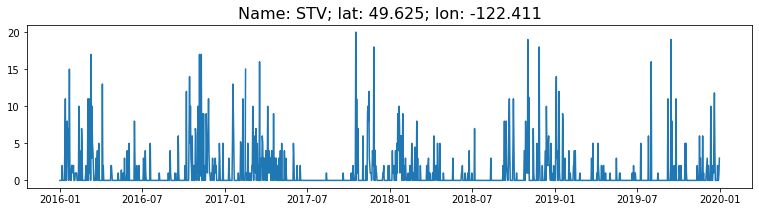

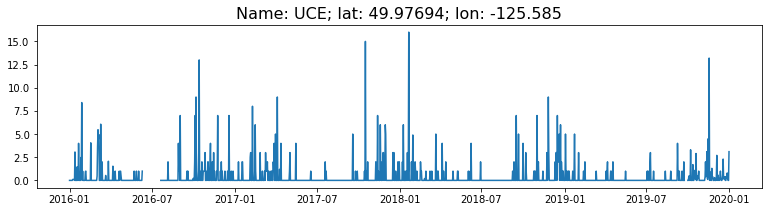

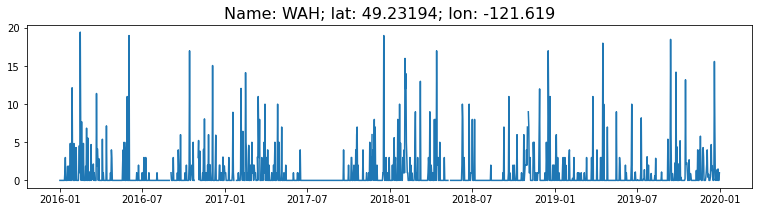

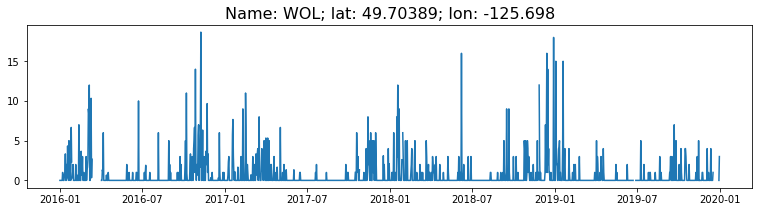

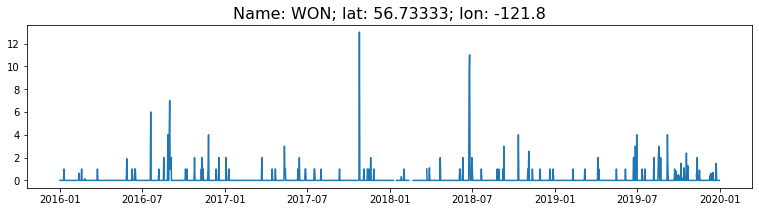

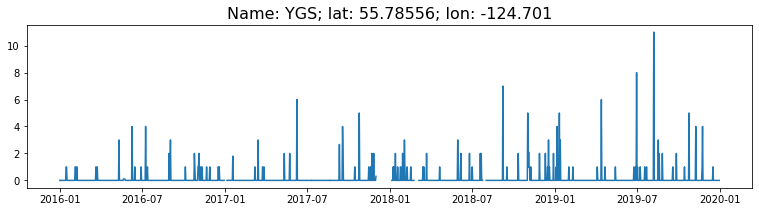

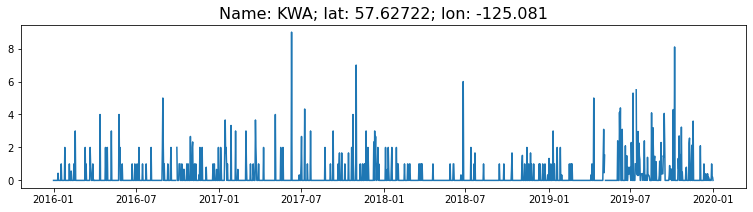

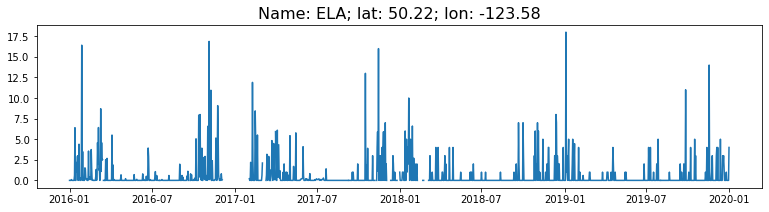

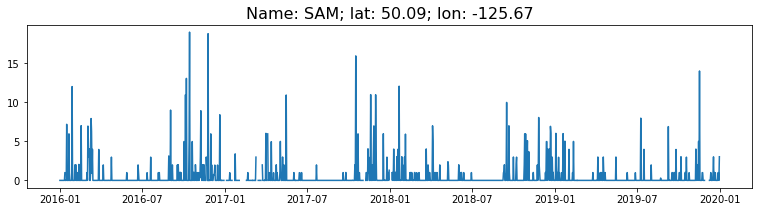

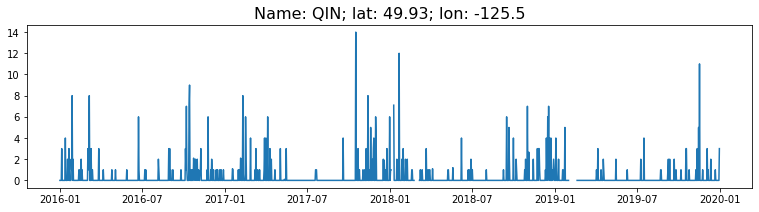

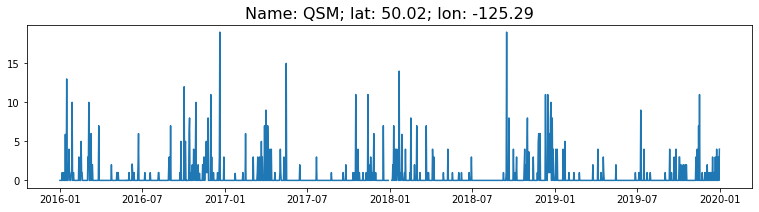

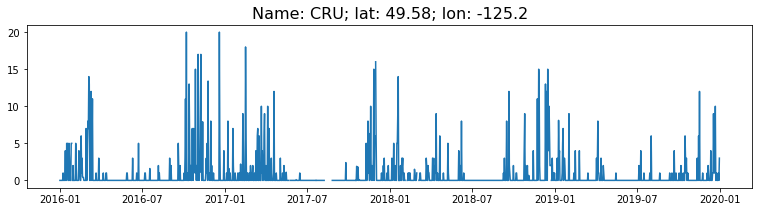

In [8]:
for i in range(len(stn_code)):
    plt.figure(figsize=(13, 3))
    plt.plot(date_list, BCH_obs[:, 0, i])
    plt.title('Name: {}; lat: {}; lon: {}'.format(stn_code[i], stn_lat[i], stn_lon[i]), fontsize=16)